# Regression Decision Tree Google Stocks and News Sentiment

Sources:
- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
- https://towardsdatascience.com/regression-trees-from-scratch-in-30-lines-of-python-8196e0ab29b2

Table of Contents:
- <a href='#section1'>Data Preprocessing</a>
    - <a href='#section1a'>Visualizing Data</a>
    - <a href='#section1b'>Training, Validation, Testing Split</a>
    - <a href='#section1c'>Scaling Data</a>
    - <a href='#section1d'>Splitting Dataset into Feature and Target Variables</a>
- <a href='#section2'>Regression Decision Tree</a>
    - <a href='#section2a'>Residual Sum of Squares (RSS)</a>
    - <a href='#section2b'>Finding the Best Rule at Each Level</a>
    - <a href='#section2c'>Split</a>
- <a href='#section3'>Analyzing Results</a>
    - <a href='#section3a'>Predicting Values</a>
    - <a href='#section3b'>Evaluation</a>
    - <a href='#section3c'>Checking Results</a>
        - <a href='#section3ci'>Training Set</a>
        - <a href='#section3cii'>Validation Set</a>
        - <a href='#section3ciii'>Testing Set</a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

# Data Preprocessing
<a id='section1'></a>
- Computing target feature 'Middle' = (High + Low) / 2

In [2]:
df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


## Visualize the Data<a id='section1a'></a>

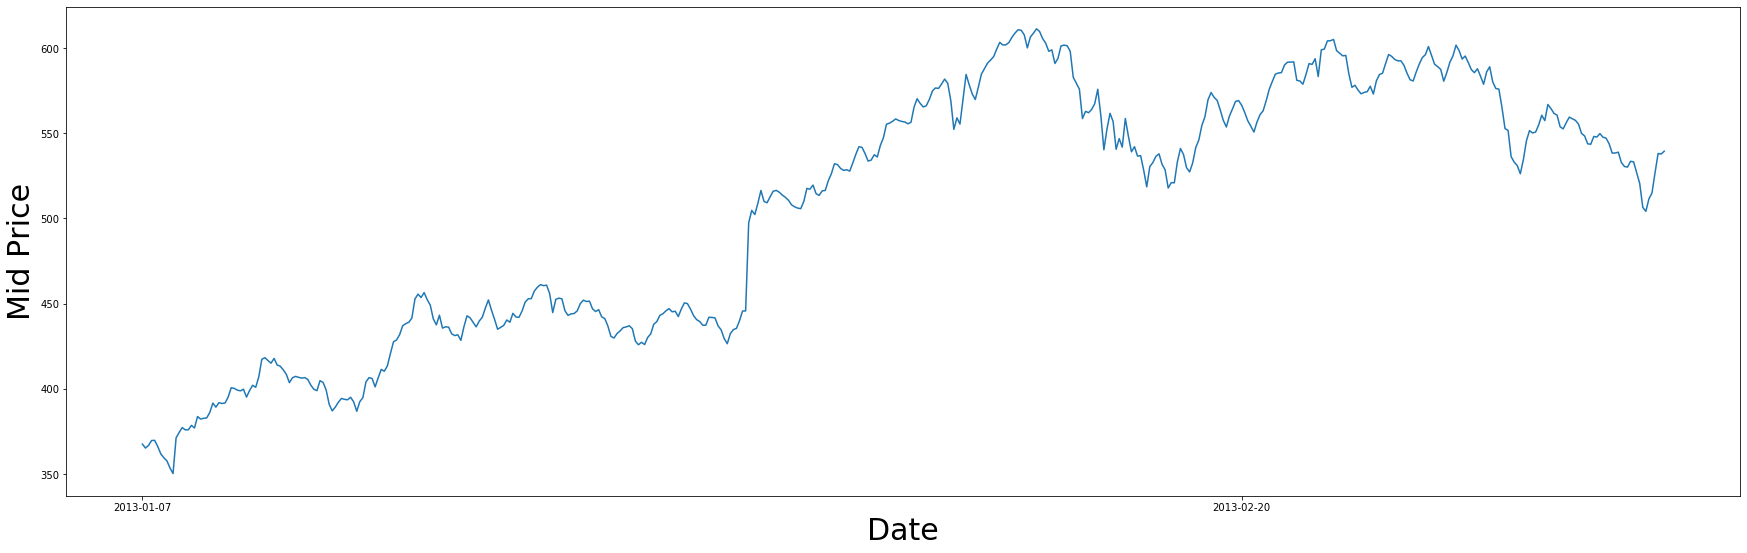

In [4]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [5]:
df = df.drop(['Date'], axis=1)

## Training, Validation, Testing Split<a id='section1b'></a>
- 80%, 20%, 20% split

In [6]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

training_data

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,0.015850,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,0.015218,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,0.015021,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,0.017239,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,0.016712,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.048387,0.145161,0.096774,0.048387,0.241935,0.241935,0.449543,0.108921,0.040155,0.019476,...,0.307310,0.184524,4981.161290,606.52,607.16,598.32,600.00,3430846,0,602.740
296,0.032787,0.163934,0.229508,0.032787,0.163934,0.262295,0.453458,0.109253,0.040083,0.018808,...,0.311149,0.148584,1957.475410,597.15,603.92,592.10,603.65,3933854,0,598.010
297,0.031250,0.140625,0.171875,0.046875,0.218750,0.234375,0.441970,0.100906,0.037052,0.017163,...,0.353050,0.112390,2599.671875,603.98,605.25,592.38,594.53,4691282,0,598.815
298,0.000000,0.078431,0.196078,0.058824,0.117647,0.176471,0.457235,0.116493,0.036585,0.017200,...,0.323362,0.232943,2969.725490,591.06,595.43,586.26,586.40,4603570,0,590.845


## Scaling Data<a id='section1c'></a>
- Applying MinMaxScaler over all features
- Note only fitting on training_data to prevent fitting on validation

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=validation_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=testing_data.columns,
              dtype='float64')

In [8]:
training_data_scaled

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.543153,0.227605,0.197980,0.199553,0.787121,0.265384,0.801997,0.838543,1.000000,0.286567,...,0.591883,0.529864,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.446970,0.512821,0.103237,0.000000,0.710903,0.404290,0.518249,0.697056,0.798920,0.219626,...,0.642715,0.143875,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.723187,0.601772,0.193135,0.132849,0.358002,0.290855,0.648240,0.538887,0.696144,0.198793,...,0.882067,0.437738,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.670455,0.588942,0.464567,0.049265,0.361019,0.129950,0.593227,0.645117,0.739473,0.433560,...,0.906167,0.110753,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.525847,0.405354,0.088055,0.231834,0.548166,0.378470,0.803652,0.744541,0.536400,0.377849,...,0.591947,0.581366,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.259531,0.434243,0.144865,0.190702,0.369681,0.602523,0.449170,0.183346,0.356334,0.670336,...,0.479048,0.570092,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.175857,0.502837,0.555957,0.129219,0.217357,0.656143,0.493522,0.186564,0.352439,0.599635,...,0.498946,0.382707,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.167614,0.417668,0.377461,0.184743,0.324403,0.582611,0.363386,0.105685,0.190029,0.425558,...,0.716110,0.193989,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.000000,0.190422,0.452421,0.231834,0.126965,0.430111,0.536312,0.256711,0.165015,0.429428,...,0.562241,0.822544,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


## Splitting Dataset into Feature and Target Variables<a id='section1d'></a>
- Target variable refers to the Middle value of the next day

In [9]:
def create_dataset(dataset):
    dataY = dataset['Middle'].drop(dataset.index[:1])
    dataY.index -= 1
    dataX = dataset.drop(dataset.index[-1:]) 
    return dataX, dataY

In [10]:
trainX, trainY = create_dataset(training_data_scaled)
validX, validY = create_dataset(validation_data_scaled)
testX, testY = create_dataset(testing_data_scaled)

# Regression Decision Tree<a id='section2'></a>

## Residual Sum of Squares (RSS) <a id='section2a'></a>
We use residual sum of squares (RSS) as a splitting mechanic to decide which feature is the most prominent at each level. Note that we are adding the squared residual sums of both the left and right side of the nodes of each branch. 

In [11]:
def rss(y_left, y_right):
    return np.sum((y_left - np.mean(y_left)) ** 2) + np.sum((y_right - np.mean(y_right)) ** 2)

## Finding the Best Rule at Each Level <a id='section2b'></a>
We find the best rule at each split by comparing the RSS for each feature and finding the smallest value. The feature and threshold that corresponds with the smallest RSS value is set as the best feature and threshold for that split

In [12]:
def find_best_rule(X_train, y_train):
    best_feature, best_threshold, min_rss = None, None, np.inf
    for feature in X_train.columns:
        thresholds = X_train[feature].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        for t in thresholds:
            y_left_ix = X_train[feature] < t
            y_left, y_right = y_train[y_left_ix], y_train[~y_left_ix]
            t_rss = rss(y_left, y_right)
            if t_rss < min_rss:
                min_rss = t_rss
                best_threshold = t
                best_feature = feature
    
    return {'feature': best_feature, 'threshold': best_threshold}

## Split <a id='section2c'></a>
Recursively split each node until we hit the set max depth or when there are less than 2 values in the training data.

In [13]:
def split(X_train, y_train, depth, max_depth):
    if depth == max_depth or len(X_train) < 2:
        return {'prediction': np.mean(y_train)}
    
    rule = find_best_rule(X_train, y_train)
    left_ix = X_train[rule['feature']] < rule['threshold']
    rule['left'] = split(X_train[left_ix], y_train[left_ix], depth + 1, max_depth)
    rule['right'] = split(X_train[~left_ix], y_train[~left_ix], depth + 1, max_depth)
    return rule

Example of a tree with a depth of 10

In [139]:
rules = split(trainX, trainY, 0, 10)
rules

{'feature': 'Open',
 'threshold': 0.5221374631042282,
 'left': {'feature': 'Close',
  'threshold': 0.26237240952675545,
  'left': {'feature': 'Open',
   'threshold': 0.12362479395867676,
   'left': {'feature': 'High',
    'threshold': 0.0833938190014134,
    'left': {'feature': 'rate_positive_words',
     'threshold': 0.649097036376002,
     'left': {'feature': 'data_channel_is_lifestyle',
      'threshold': 0.626918536009445,
      'left': {'feature': 'data_channel_is_lifestyle',
       'threshold': 0.5521390374331551,
       'left': {'prediction': 0.0},
       'right': {'prediction': 0.012664048280486284}},
      'right': {'feature': 'data_channel_is_lifestyle',
       'threshold': 0.6704545454545454,
       'left': {'prediction': 0.03559727943289559},
       'right': {'prediction': 0.028546795670082892}}},
     'right': {'feature': 'data_channel_is_entertainment',
      'threshold': 0.576923076923077,
      'left': {'feature': 'data_channel_is_lifestyle',
       'threshold': 0.55011

# Analyzing Results <a id='section3'></a>

## Predicting Values <a id='section3a'></a>
The predict function takes in a trained decision tree and a sample of features and iterates down the decision tree, checking which end of the threshold that feature's value lies in until it hits a leaf.

In [33]:
def predict(sample, tree):
    prediction = None
    while prediction is None:
        feature, threshold = tree['feature'], tree['threshold']
        if sample[feature] < threshold:
            tree = tree['left']
        else:
            tree = tree['right']
        prediction = tree.get('prediction', None)
    return prediction

Example of an actual value versus the prediction

In [35]:
print("Prediction / Actual")
print(predict(validX.iloc[0], rules), "/", validY[0])

Prediction / Actual
0.9788169928379434 / 0.9632723440942619


## Evaluation <a id='section3b'></a>
In order to determine the max depth we should use, we evaluate various trees at different depths and measure the $R^2$ of the test set on each of the trees.

In [15]:
def evaluate(X, y):
    preds = X.apply(predict, axis='columns', rules=rules.copy())
    return r2_score(preds, y)

In [145]:
for max_depth in range(3, 15):
    rules = split(trainX, trainY, 0, max_depth)
    train_r2 = evaluate(trainX, trainY)
    test_r2 = evaluate(testX, testY)
    print('Max Depth', max_depth, 'Training R2:', train_r2, 'Test R2:',test_r2)

Max Depth 3 Training R2: 0.9877421751426554 Test R2: 0.7594426431504178
Max Depth 4 Training R2: 0.9947569468885248 Test R2: 0.8936397772915595
Max Depth 5 Training R2: 0.9981591836590865 Test R2: 0.8659706386015071
Max Depth 6 Training R2: 0.9991452311742769 Test R2: 0.8535050583176045
Max Depth 7 Training R2: 0.9996524987028743 Test R2: 0.8580086620007283
Max Depth 8 Training R2: 0.9998896421944641 Test R2: 0.8577122928412548
Max Depth 9 Training R2: 0.9999765680532811 Test R2: 0.8586519747113432
Max Depth 10 Training R2: 0.9999962287706842 Test R2: 0.8569614369730036
Max Depth 11 Training R2: 0.9999994726845947 Test R2: 0.8580056495424337
Max Depth 12 Training R2: 0.9999999636427022 Test R2: 0.8582462877400822
Max Depth 13 Training R2: 0.9999999972219722 Test R2: 0.8582462877400822
Max Depth 14 Training R2: 1.0 Test R2: 0.8582462877400822


Judging by the outputs, the best depth we shall go with is 4.

In [16]:
rules = split(trainX, trainY, 0, 4)

## Checking Results <a id='section3c'></a>
Actual values = Blue

Predicted values = Orange

### Training Set <a id='section3ci'></a>

In [26]:
prediction_inputs = training_data_scaled.copy()
predictions = []
for i in range(len(prediction_inputs)):
    predictions.append(predict(prediction_inputs.iloc[i], rules))
prediction_inputs['Middle'] = predictions
    
results = sc.inverse_transform(prediction_inputs)
results = [data[len(results[0]) - 1] for data in results]

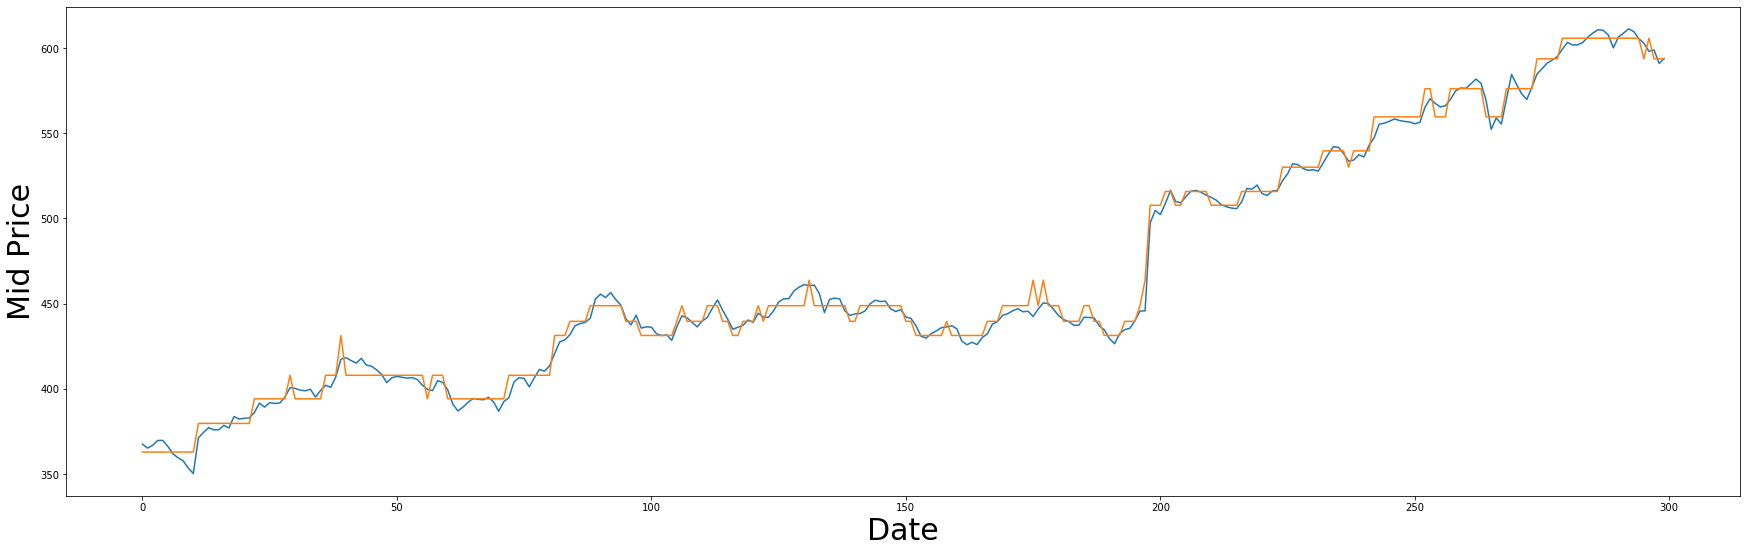

In [29]:
plt.figure(figsize = (30,9))
plt.plot(range(training_data.shape[0]), training_data['Middle'])
plt.plot(range(training_data.shape[0]), results)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

### Validation Set <a id='section3cii'></a>

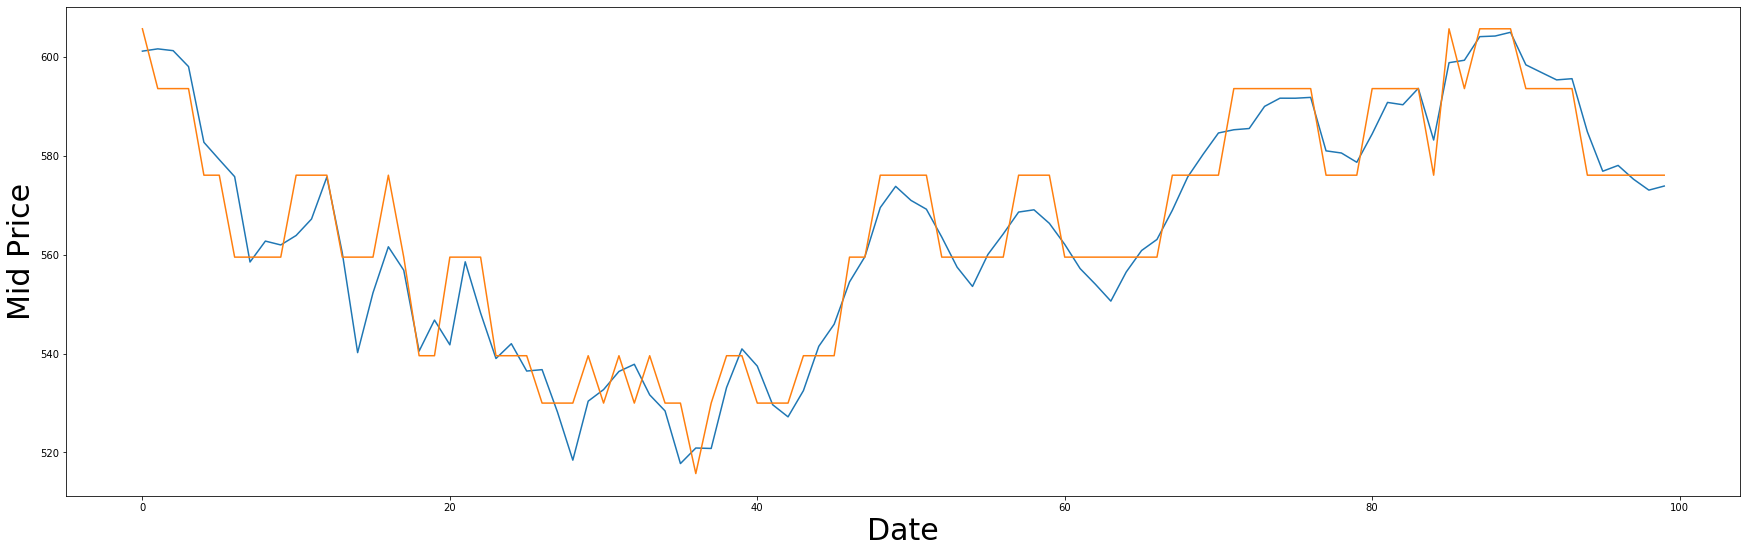

In [30]:
prediction_inputs = validation_data_scaled.copy()
predictions = []
for i in range(len(prediction_inputs)):
    predictions.append(predict(prediction_inputs.iloc[i], rules))
prediction_inputs['Middle'] = predictions
    
results = sc.inverse_transform(prediction_inputs)
results = [data[len(results[0]) - 1] for data in results]

plt.figure(figsize = (30,9))
plt.plot(range(validation_data.shape[0]), validation_data['Middle'])
plt.plot(range(validation_data.shape[0]), results)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

### Test Set <a id='section3ciii'></a>

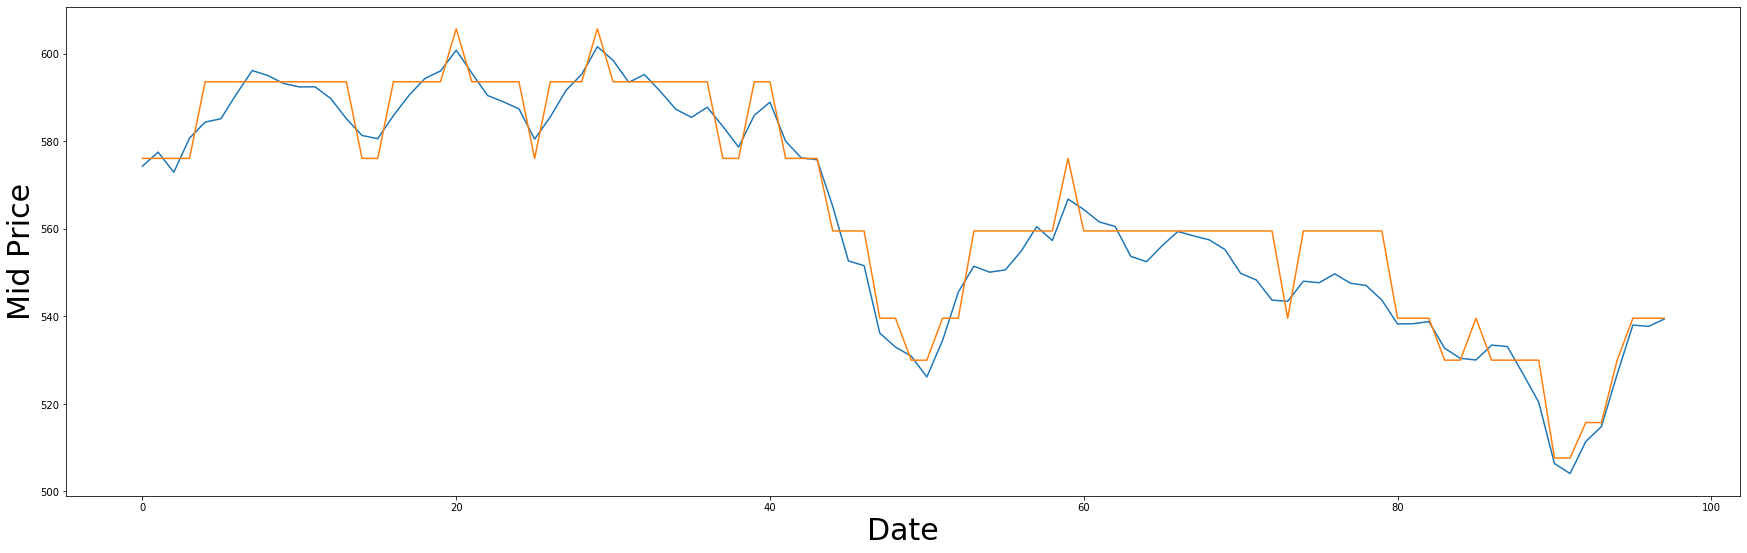

In [31]:
prediction_inputs = testing_data_scaled.copy()
predictions = []
for i in range(len(prediction_inputs)):
    predictions.append(predict(prediction_inputs.iloc[i], rules))
prediction_inputs['Middle'] = predictions
    
results = sc.inverse_transform(prediction_inputs)
results = [data[len(results[0]) - 1] for data in results]

plt.figure(figsize = (30,9))
plt.plot(range(testing_data.shape[0]), testing_data['Middle'])
plt.plot(range(testing_data.shape[0]), results)
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

As we can see, the predicted values are very rigid and concrete. This is due to the regression decision tree not actually predicting values continuously, and reiterating values from the original training dataset. That is also why the shape of the predicted values fit much more precisely to the training set compared to the testing set. Thus, a decision tree is good to predict the general trend and shape of the stock prices but not as good at predicting the actual values.